### Support Vector Classifier Implimentation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
## lets create synthetic data points
from sklearn.datasets import make_classification

In [3]:
x,y = make_classification(n_samples=1000,n_classes=2,n_features=2,n_clusters_per_class=1,n_redundant=0)

In [4]:
x

array([[-0.98579409,  0.96302667],
       [-1.70407616,  1.01698408],
       [ 1.55528823,  0.40218407],
       ...,
       [ 0.5501112 ,  1.62655599],
       [ 0.44618929,  2.26569872],
       [-0.9846928 ,  0.90563621]], shape=(1000, 2))

In [5]:
pd.DataFrame(x)[0]

0     -0.985794
1     -1.704076
2      1.555288
3      1.541594
4     -0.266840
         ...   
995    0.625168
996   -0.272344
997    0.550111
998    0.446189
999   -0.984693
Name: 0, Length: 1000, dtype: float64

In [6]:
y

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,

<Axes: xlabel='feature1', ylabel='feature2'>

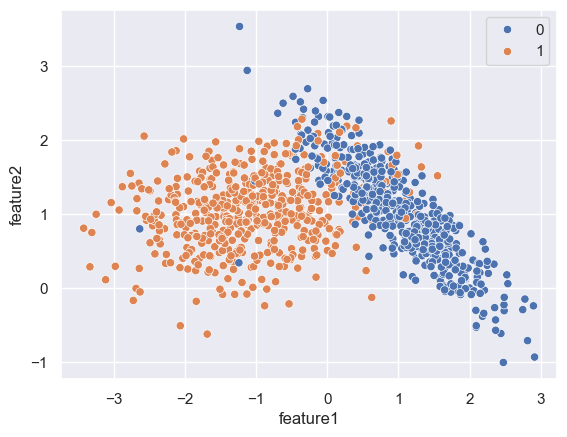

In [7]:
df = pd.DataFrame(x, columns=['feature1', 'feature2'])
sns.scatterplot(x='feature1', y='feature2', hue=y, data=df)

In [8]:
from sklearn.svm import SVC

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [11]:
svc=SVC(kernel='linear') #if datasets looks in linear point figure use linear kernel

In [12]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [13]:
## Predictions
y_pred = svc.predict(x_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       134
           1       0.95      0.91      0.93       116

    accuracy                           0.94       250
   macro avg       0.94      0.93      0.94       250
weighted avg       0.94      0.94      0.94       250

[[129   5]
 [ 11 105]]


### RBF Kernel (Radial Basis Function kernel)
It measures the similarity between two data points by calculating the exponential of the negative squared Euclidean distance between them:

$$ K(\mathbf{x}, \mathbf{x'}) = \exp\left(-\frac{|\mathbf{x} - \mathbf{x'}|^2}{2\sigma^2}\right) $$

In [16]:
rbf = SVC(kernel='rbf')

In [17]:
rbf.fit(x_train,y_train)

SVC()

In [18]:
y_pred1 = rbf.predict(x_test)

In [19]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       134
           1       0.97      0.90      0.93       116

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[131   3]
 [ 12 104]]


### Polynomial Kernel


In [22]:
poly = SVC(kernel='poly')
poly.fit(x_train,y_train)
y_pred2 = poly.predict(x_test)

In [23]:

print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       134
           1       0.92      0.92      0.92       116

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[125   9]
 [  9 107]]


### Sigmoid Kernel

In [24]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(x_train,y_train)
y_pred3 = sigmoid.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       134
           1       0.81      0.82      0.81       116

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250

[[111  23]
 [ 21  95]]


### Hyperparameter tuning

In [28]:
from sklearn.model_selection import GridSearchCV

#defining parameter range
para_grid = {'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}

In [29]:
grid = GridSearchCV(SVC(),param_grid=para_grid,refit=True,cv=5,verbose=3)

In [30]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [32]:
grid.best_params_  #selected parameters for train

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [33]:
y_pred4 = grid.predict(x_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       134
           1       0.96      0.91      0.93       116

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[130   4]
 [ 11 105]]
